## VAR (Vector AutoRegression)

Untuk VAR yang perlu digaris bawahi adalah melakukan prediksi atau ramalan dengan menggunakan time series lainnya yang diyakini saling memberikan efek atau pengaruh satu sama lainnya.

In [1]:
import pandas as pd
import numpy as np

# load specific forecasting tools
from statsmodels.tsa.api import VAR # model 
from statsmodels.tsa.stattools import adfuller # to stationarity test
from statsmodels.tools.eval_measures import rmse # to evaluate model

import warnings
warnings.filterwarnings('ignore')

In [2]:
stock_df = pd.read_csv("UDEMY_TSA_FINAL/Data/M2SLMoneyStock.csv", index_col=0, parse_dates=True)
stock_df.index.freq = 'MS'

In [3]:
spend_df = pd.read_csv("UDEMY_TSA_FINAL/Data/PCEPersonalSpending.csv", index_col=0, parse_dates=True)
spend_df.index.freq = 'MS'

In [4]:
stock_df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [5]:
spend_df.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [6]:
# join the two dataframes
df = stock_df.join(spend_df)
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 1995-01-01 to 2015-12-01
Freq: MS
Data columns (total 2 columns):
Money       252 non-null float64
Spending    252 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB


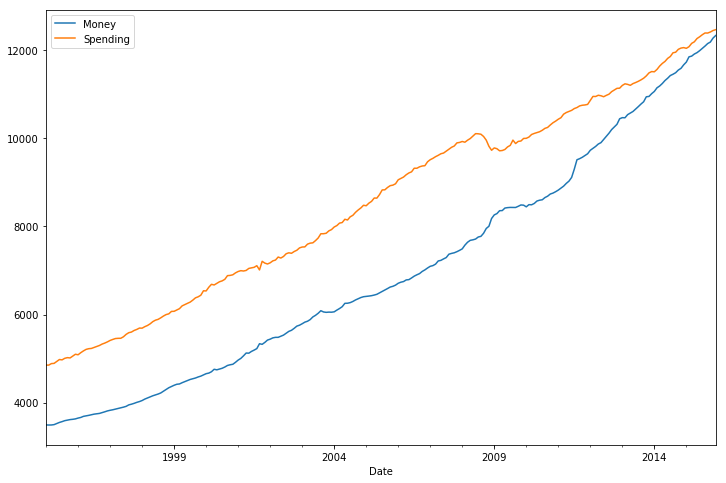

In [8]:
# plot joined dataframes
df.plot(figsize=(12, 8)).autoscale(axis='x', tight=True)

In [9]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [10]:
# stationarity /adf test
adf_test(df['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [11]:
adf_test(df['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Keduanya non-stationary, sehingga kita akan melakukan differencing

In [12]:
# 1st difference
df_transformed = df.diff()

In [13]:
df_transformed.head()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9


In [14]:
# adf test
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [15]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Dalam menggunakan VAR keduan time series harus memiliki jumlah baris yang sama 

In [16]:
# 2nd differencing
# and drop Nan rows
df_transformed = df_transformed.diff().dropna()

In [17]:
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [18]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [19]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Kedua time series stationary setelah differencing yang kedua.

In [20]:
df_transformed.shape

(250, 2)

In [21]:
# Num of Observations, that we want to predict
nobs = 12

In [22]:
# train test split
train = df_transformed.iloc[:-nobs]
test = df_transformed.iloc[-nobs:]

In [23]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


In [24]:
list(range(12))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [25]:
# grid seacrh for p AR for VAR model
model = VAR(train)

order_rows = []
for p in range(12):
    result = model.fit(p+1)
    aic = result.aic
    order_rows.append([p+1, aic])
    
order_df = pd.DataFrame(order_rows, columns=['order', 'aic'])
order_df.sort_values(by='aic')
    

,order,aic
7,8,13.747201
8,9,13.768072
4,5,13.787300
6,7,13.797639
5,6,13.799077
9,10,13.806012
3,4,13.827951
10,11,13.846323
2,3,13.849518
11,12,13.883680


In [26]:
model = VAR(train)
fitted_model = model.fit(8)

In [27]:
fitted_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 29, Jan, 2021
Time:                     22:39:02
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.2554
Nobs:                     230.000    HQIC:                   13.9522
Log likelihood:          -2199.64    FPE:                    934476.
AIC:                      13.7472    Det(Omega_mle):         810270.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.920234         1.774714            0.519           0.604
L1.Money           -0.711320         0.070127          -10.143           0.000
L1.Spending        -0.130975         0.053364           -2.454      

Salah satu parameter VAR forcast ```fitted_model.forecast()``` adalah *lagged values* sebanyak order (dalam kasus ini adalah 8) dari dua time series data. Inpun parameter yang diharapkan memiliki bentuk p x k, p nilai order, k jumlah time series. *Lagged values* diperoleh dari baris akhir data sebanyak order, tepat sebelum waktu yang diprediksi atau diramalkan.

In [28]:
lagged_values = train.values[-8:]
lagged_values

array([[ 11.3, -13.8],
       [-15.5,  22.8],
       [  9. , -25.1],
       [-31.9,  40.3],
       [  5.6, -70.7],
       [ 25.5,  52.5],
       [-21.3, -37.2],
       [ 39.5, -17.8]])

In [29]:
z = fitted_model.forecast(y=lagged_values, steps=12)

In [30]:
z

array([[-11.3947976 ,  38.52019695],
       [ -1.20783678, -14.66430212],
       [  0.74211832,  -2.07585244],
       [ -9.28360027,   5.07588644],
       [  5.03113889,   9.06629031],
       [ -7.08489132,  -8.1896363 ],
       [  3.3809384 ,   8.43308478],
       [ -0.40485797,  -3.40892607],
       [  1.1576336 ,  -8.16614693],
       [  2.76945975,   6.48422014],
       [  0.63451513,  -3.26441789],
       [ -0.79178199,  -1.23545081]])

In [31]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


In [32]:
# based on date in test
idx = pd.date_range("2015-01-01", periods=12, freq='MS')
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [33]:
forecast_df = pd.DataFrame(z, index=idx, columns=['Money_2d', 'Spending_2d'])

In [34]:
forecast_df

,Money_2d,Spending_2d
2015-01-01,-11.394798,38.520197
2015-02-01,-1.207837,-14.664302
2015-03-01,0.742118,-2.075852
2015-04-01,-9.283600,5.075886
2015-05-01,5.031139,9.066290
2015-06-01,-7.084891,-8.189636
2015-07-01,3.380938,8.433085
2015-08-01,-0.404858,-3.408926
2015-09-01,1.157634,-8.166147
2015-10-01,2.769460,6.484220


In [37]:
# invert the transformation
# for column 'Money_2d'
# Add the most recent 1st difference from the training side of the original dataset to the forecast cumulative sum
forecast_df['Money_1d'] = df['Money'].iloc[-nobs-1]
forecast_df['Money_1d']

2015-01-01    11670.1
2015-02-01    11670.1
2015-03-01    11670.1
2015-04-01    11670.1
2015-05-01    11670.1
2015-06-01    11670.1
2015-07-01    11670.1
2015-08-01    11670.1
2015-09-01    11670.1
2015-10-01    11670.1
2015-11-01    11670.1
2015-12-01    11670.1
Freq: MS, Name: Money_1d, dtype: float64

In [38]:
forecast_df['Money_1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2])
forecast_df['Money_1d']

2015-01-01    78.6
2015-02-01    78.6
2015-03-01    78.6
2015-04-01    78.6
2015-05-01    78.6
2015-06-01    78.6
2015-07-01    78.6
2015-08-01    78.6
2015-09-01    78.6
2015-10-01    78.6
2015-11-01    78.6
2015-12-01    78.6
Freq: MS, Name: Money_1d, dtype: float64

In [40]:
forecast_df['Money_1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + forecast_df['Money_2d'].cumsum()
forecast_df['Money_1d']

2015-01-01    67.205202
2015-02-01    65.997366
2015-03-01    66.739484
2015-04-01    57.455884
2015-05-01    62.487023
2015-06-01    55.402131
2015-07-01    58.783070
2015-08-01    58.378212
2015-09-01    59.535845
2015-10-01    62.305305
2015-11-01    62.939820
2015-12-01    62.148038
Freq: MS, Name: Money_1d, dtype: float64

In [41]:
forecast_df['MoneyForecast'] = df['Money'].iloc[-nobs-1] + forecast_df['Money_1d'].cumsum()

In [42]:
forecast_df

,Money_2d,Spending_2d,Money_1d,MoneyForecast
2015-01-01,-11.394798,38.520197,67.205202,11737.305202
2015-02-01,-1.207837,-14.664302,65.997366,11803.302568
2015-03-01,0.742118,-2.075852,66.739484,11870.042052
2015-04-01,-9.283600,5.075886,57.455884,11927.497936
2015-05-01,5.031139,9.066290,62.487023,11989.984958
2015-06-01,-7.084891,-8.189636,55.402131,12045.387089
2015-07-01,3.380938,8.433085,58.783070,12104.170159
2015-08-01,-0.404858,-3.408926,58.378212,12162.548371
2015-09-01,1.157634,-8.166147,59.535845,12222.084216
2015-10-01,2.769460,6.484220,62.305305,12284.389521


In [43]:
# for column Spending_2d
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
forecast_df['Spending_1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + forecast_df['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
forecast_df['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + forecast_df['Spending_1d'].cumsum()

In [44]:
forecast_df

,Money_2d,Spending_2d,Money_1d,MoneyForecast,Spending_1d,SpendingForecast
2015-01-01,-11.394798,38.520197,67.205202,11737.305202,49.120197,12111.120197
2015-02-01,-1.207837,-14.664302,65.997366,11803.302568,34.455895,12145.576092
2015-03-01,0.742118,-2.075852,66.739484,11870.042052,32.380042,12177.956134
2015-04-01,-9.283600,5.075886,57.455884,11927.497936,37.455929,12215.412063
2015-05-01,5.031139,9.066290,62.487023,11989.984958,46.522219,12261.934282
2015-06-01,-7.084891,-8.189636,55.402131,12045.387089,38.332583,12300.266865
2015-07-01,3.380938,8.433085,58.783070,12104.170159,46.765668,12347.032533
2015-08-01,-0.404858,-3.408926,58.378212,12162.548371,43.356742,12390.389274
2015-09-01,1.157634,-8.166147,59.535845,12222.084216,35.190595,12425.579869
2015-10-01,2.769460,6.484220,62.305305,12284.389521,41.674815,12467.254684


In [45]:
test_range = df[-nobs:]

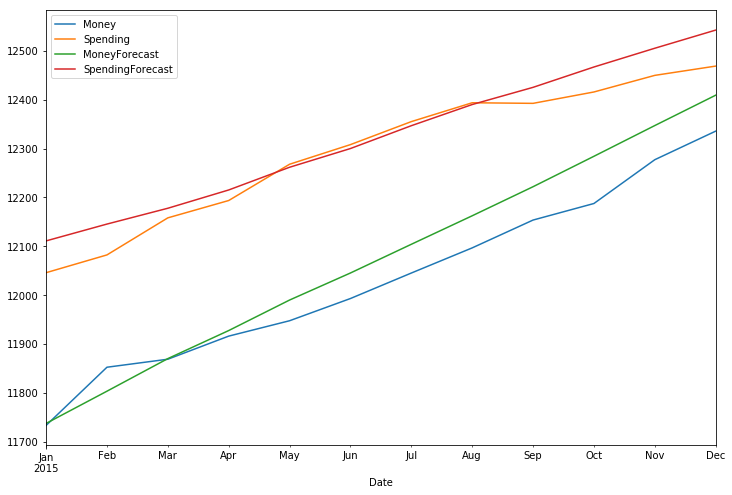

In [51]:
test_range.plot(figsize=(12, 8)).autoscale(axis='x', tight=True)
forecast_df['MoneyForecast'].plot(legend=True)
forecast_df['SpendingForecast'].plot(legend=True)

In [52]:
# rmse Money
rmse(test_range['Money'], forecast_df['MoneyForecast'])

57.14978534973776

In [53]:
test_range['Money'].mean()

12034.008333333333

In [54]:
# rmse Spending
rmse(test_range['Spending'], forecast_df['SpendingForecast'])

42.31557417803694

In [55]:
test_range['Spending'].mean()

12294.533333333335

## VARMA

In [56]:
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
from pmdarima import auto_arima

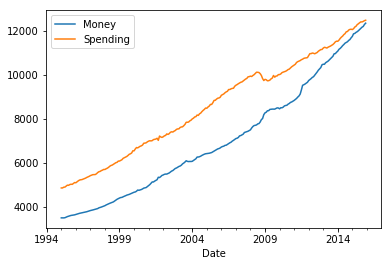

In [58]:
df.plot()

In [61]:
auto_arima(df['Money'], maxiter=1000).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 2, 2)   Log Likelihood               -1172.257
Date:                Fri, 29 Jan 2021   AIC                           2354.514
Time:                        23:21:26   BIC                           2372.121
Sample:                             0   HQIC                          2361.600
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0722      0.037      1.931      0.054      -0.001       0.145
ar.L1          0.5993      0.170      3.530      0.000       0.267       0.932
ma.L1         -1.3813      1.159     -1.192      0.233      -3.653       0.890
ma.L2          0.3814      0.507      0.753      0.452      -0.611       1.374
sigma2       679.6900    745.123      0.912      0.362    -780.725    2140.105
===================================================================================
Ljung-Box (Q):                       77.22   Jarque-Bera (JB):               576.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.47   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
auto_arima(df['Spending'], maxiter=1000).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1238.601
Date:                Fri, 29 Jan 2021   AIC                           2487.202
Time:                        23:21:14   BIC                           2504.829
Sample:                             0   HQIC                          2494.295
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.7221      3.525      1.907      0.057      -0.187      13.631
ar.L1          0.7774      0.120      6.469      0.000       0.542       1.013
ma.L1         -0.7889      0.117     -6.767      0.000      -1.017      -0.560
ma.L2          0.1342      0.062      2.171      0.030       0.013       0.255
sigma2      1131.1342     61.857     18.286      0.000    1009.897    1252.371
===================================================================================
Ljung-Box (Q):                       34.25   Jarque-Bera (JB):               216.24
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.30
Prob(H) (two-sided):                  0.92   Kurtosis:                         7.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
# 2nd differencing df
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [64]:
train.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [65]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8
